# AMPSphere v.2022-03

This is a notebook meant to form the set of notebooks used to analyze the data in AMPSphere and write the manuscript:

__AMPSphere: Global survey of prokaryotic antimicrobial peptides shaping microbiomes__

Figures generated in this script formed the panel shown in Figure 1D.

### Sankey plots

Sankey plots were drawn to make a better visualization for the overlaps across different habitats.

In [280]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import chain, permutations

In [281]:
# load data
data = pd.read_table('../data_folder/gmsc_amp_genes_envohr_source.tsv.gz',
                     sep='\t',
                     header='infer')

In [282]:
# filter duplicates
data = data[data.is_metagenomic == True]
data = data[['amp', 'general_envo_name']].drop_duplicates()
data = data.groupby('general_envo_name')['amp'].apply(lambda x: set(x))

In [283]:
# add environments with at least 100 peptides
data = data.apply(lambda x: x if len(x) >= 100 else 'NA')
data = data[data != 'NA']

In [284]:
# creating sets of environments
higher_level = {
        'sediment' : 'other',
        'bird gut' : 'other animal',
        'cat gut' : 'mammal gut',
        'insect associated' : 'other animal',
        'human urogenital tract' : 'other human',
        'dog gut' : 'mammal gut',
        'fermented food' : 'anthropogenic',
        'groundwater' : 'aquatic',
        'coral associated' : 'other animal',
        'rat gut' : 'mammal gut',
        'human associated' : 'other human',
        'cattle gut' : 'mammal gut',
        'deer gut' : 'mammal gut',
        'mouse gut' : 'mammal gut',
        'river associated' : 'aquatic',
        'primate gut' : 'mammal gut',
        'human respiratory tract' : 'other human',
        'cattle rumen' : 'other animal',
        'human saliva' : 'other human',
        'activated sludge' : 'anthropogenic',
        'lake associated' : 'aquatic',
        'wastewater' : 'anthropogenic',
        'chicken gut' : 'other animal',
       'air' : 'other',
        'human mouth' : 'other human',
        'plant associated' : 'soil/plant',
        'water associated' : 'aquatic',
        'pig gut' : 'mammal gut',
        'human skin' : 'other human',
        'marine' : 'aquatic',
        'soil' : 'soil/plant',
        'built environment' : 'anthropogenic',
        'human gut' : 'human gut',
        'anthropogenic': 'anthropogenic',
        'bear gut' : 'mammal gut',
        'rabbit gut': 'mammal gut',
        'algae associated': 'other',
        'crustacean gut': 'other animal',
        'cattle associated': 'other animal',
        'bird skin': 'other animal',
        'bee gut': 'other animal',
        'mussel associated': 'other animal',
        'fisher gut': 'mammal gut',
        'bat gut': 'mammal gut',
        'sponge associated': 'other animal',
        'human digestive tract': 'other human',
        'beatle gut': 'other animal',
        'dog associated': 'other animal',
        'insect gut': 'other animal',
        'extreme pH': 'other',
        'food': 'other',
        'guinea pig gut': 'mammal gut',
        'goat rumen': 'other animal',
        'mollusc associated': 'other animal',
        'goat gut': 'mammal gut',
        'horse gut': 'mammal gut',
        'wasp gut': 'other animal',
        'tunicate associated': 'other animal',
        'annelidae associated': 'other animal',
        'rodent gut': 'mammal gut',
        'ship worm associated': 'other animal',
        'coyote gut': 'mammal gut',
        'crustacean associated': 'other animal',
        'termite gut': 'other animal',
        'planarian associated': 'other animal',
        'thermal vent associated': 'other',
        'fish gut': 'other animal',
        'ice associated': 'other',
        'mock community': 'other',
        'mine': 'other',
        'pond associated': 'aquatic',
        'hot spring associated': 'other',
        }

In [285]:
color_map = {'human gut' : (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
        'soil/plant' : (0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
        'aquatic' : (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
        'anthropogenic' : (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
        'other human' : (0.4, 0.6509803921568628, 0.11764705882352941),
        'mammal gut' : (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
        'other animal' : (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
        'other' : (0.4, 0.4, 0.4)}

In [286]:
# add the high_level environment
data = data.reset_index()
data['high'] = [higher_level[x] for x in data.general_envo_name]
data.set_index('general_envo_name', inplace=True)
data

,amp,high
general_envo_name,,
activated sludge,"{AMP10.367_200, AMP10.497_927, AMP10.038_250, ...",anthropogenic
air,"{AMP10.000_075, AMP10.108_567, AMP10.255_998, ...",other
algae associated,"{AMP10.564_451, AMP10.772_370, AMP10.814_255, ...",other
annelidae associated,"{AMP10.122_598, AMP10.465_643, AMP10.542_576, ...",other animal
anthropogenic,"{AMP10.232_279, AMP10.472_820, AMP10.493_537, ...",anthropogenic
...,...,...
termite gut,"{AMP10.822_890, AMP10.459_304, AMP10.595_050, ...",other animal
thermal vent associated,"{AMP10.787_450, AMP10.620_887, AMP10.806_038, ...",other
tunicate associated,"{AMP10.543_474, AMP10.793_992, AMP10.836_954, ...",other animal


In [287]:
# calculate overlap
df = []
combs = permutations(data.index, 2)
for i, j in combs:
    set_i = data.loc[i, 'amp']
    set_j = data.loc[j, 'amp']
    n = len(set_i.intersection(set_j))
    df.append((i, j, n))

# including doubled pair
for i in data.index:
    df.append((i,
               i,
               len(data.loc[i, 'amp'])))

# formatting table
df = pd.DataFrame(df, columns=['env1', 'env2', 'overlap'])
df = df.pivot(index='env1', columns='env2', values='overlap')
df

env2,activated sludge,air,algae associated,annelidae associated,anthropogenic,bear gut,beatle gut,bee gut,bird gut,bird skin,...,rodent gut,sediment,ship worm associated,soil,sponge associated,termite gut,thermal vent associated,tunicate associated,wastewater,water associated
env1,,,,,,,,,,,,,,,,,,,,,
activated sludge,33206,94,0,6,666,5,0,10,20,4,...,1,140,0,1289,0,5,6,0,9719,1113
air,94,3681,0,3,31,12,1,4,22,7,...,0,17,0,590,0,6,5,0,334,117
algae associated,0,0,232,0,7,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
annelidae associated,6,3,0,6457,3,0,0,1,0,0,...,0,0,4,23,2,41,69,0,12,24
anthropogenic,666,31,7,3,4055,6,1,4,8,4,...,0,12,0,377,3,3,4,0,722,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
termite gut,5,6,0,41,3,3,4,0,0,0,...,0,3,5,101,0,12372,0,0,14,30
thermal vent associated,6,5,0,69,4,1,0,0,1,0,...,0,7,0,22,1,0,1523,0,8,19
tunicate associated,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1322,0,0


In [288]:
# normalize
df = df * 100 / df.max(axis=0)

# organize environments
df['high'] = [higher_level.get(x, 'other') for x in df.index]
# sort high level habitat and low level envo names
df = df.sort_index().sort_values(by='high')
df = df.drop('high', axis=1)
# sort columns by high level habitat
ncol = df.index
df = df[ncol]

In [289]:
# create a color map for the general envo having
# as keys the high level environment
colors = [color_map[higher_level[i]] for i in df.index]

In [291]:
# set order for env1
df = data.groupby('high')['amp'].apply(lambda x: set(chain.from_iterable(x)))
df.index=(4,5,0,1,7,3,2,6)
df.sort_index()
df.index=("human gut","mammal gut",
             "other human","other animal",
             "anthropogenic","aquatic",
             "soil/plant","other")
# data prepare to R figures
animals=df.index.values.tolist()
sets=df.values.tolist()
animals

['human gut',
 'mammal gut',
 'other human',
 'other animal',
 'anthropogenic',
 'aquatic',
 'soil/plant',
 'other']

In [292]:
# function to get position
#     y1###########y4
#     #            #
#     #            #
#     y2###########y3

def getPositon(n):
    lst=[]
    for i in range(n):
        st=set()
        i_lst=[]
        for j in range(n):
            length=len(set(sets[i]).intersection(set(sets[j])))# get intersection bewteen animals[i] and animals[j]
            position=len(set(sets[i]).intersection(st)-
                         set(sets[i]).intersection(st).intersection(set(sets[j])))# Get the initial position, the position where the shadow moves down
            y1=(n-i)*100-position*100/len(sets[i])+(n-i)*20 # Calculate the coordinate y1
            y2=y1-length*100/len(sets[i])# Calculate the coordinate y1
            i_lst.append([y1,y2])
            if i != j:
                st=st.union(set(sets[j])) 
        lst.append(i_lst)
    res=[]
    for i in range(n):
        for j in range(i+1,n):
            tem=[]
            tem.append(animals[i])
            tem.append(animals[j])
            tem.append(lst[i][j][0])#y1
            tem.append(lst[i][j][1])#y2
            tem.append(lst[j][i][1])#y3 # symmetry
            tem.append(lst[j][i][0])#y4
            res.append(tem)

    return res


res=getPositon(8)
res=pd.DataFrame(res)
res.to_csv("position.txt")   # this file is use to R

In [293]:
res

,0,1,2,3,4,5
0,human gut,mammal gut,960.000000,951.056892,836.409495,840.000000
1,human gut,other human,951.833744,939.977439,710.892931,720.000000
2,human gut,other animal,943.689585,938.891241,596.052543,600.000000
3,human gut,anthropogenic,939.675071,936.888636,464.179597,480.000000
4,human gut,aquatic,939.030795,935.619854,357.025144,360.000000
5,human gut,soil/plant,937.749221,932.656650,218.253960,240.000000
6,human gut,other,935.722194,927.428013,117.740378,120.000000
7,mammal gut,other human,836.721388,836.221332,710.532936,711.489647
8,mammal gut,other animal,836.389885,836.182579,595.922429,596.347215
9,mammal gut,anthropogenic,836.436109,834.642257,442.244965,467.613074


In [294]:
combs = permutations(df.index, 2)

newdf = []
for i, j in combs:
    set_i = df.loc[i]
    set_j = df.loc[j]
    n = len(set_i.intersection(set_j))
    newdf.append((i, j, n))
    
for i in df.index:
    newdf.append((i,
                  i,
                  len(df.loc[i]))
                )

newdf = pd.DataFrame(newdf, columns=['env1', 'env2', 'overlap'])
newdf = newdf.pivot(index='env1', columns='env2', values='overlap')
newdf

env2,anthropogenic,aquatic,human gut,mammal gut,other,other animal,other human,soil/plant
env1,,,,,,,,
anthropogenic,15145,480,2396,3842,1474,202,351,375
aquatic,480,98593,2933,3395,1838,15470,9716,719
human gut,2396,2933,85988,7690,7132,4126,10195,4379
mammal gut,3842,3395,7690,214176,15974,444,1071,784
other,1474,1838,7132,15974,315628,840,1180,847
other animal,202,15470,4126,444,840,104523,21535,516
other human,351,9716,10195,1071,1180,21535,111946,4769
soil/plant,375,719,4379,784,847,516,4769,20137


In [295]:
newdf.to_csv("env_newdf.txt",sep="\t") # this file is to use in the following R script

#### R code

```
library(ggforce)
library(stringr)
library(ggplot2)
library(dplyr)
# ##########################################################
# load file
# ##########################################################

file = read.table("env_newdf.txt", 
                  header=T, 
                  row.names= 1, 
                  sep="\t", 
                  stringsAsFactors = F, 
                  check.names = FALSE) 

norm_file<-apply(file,2,function(x) x/max(x)*100)
diag(norm_file)<-0

norm_file %>%
  as_tibble(rownames = "from") %>%
  reshape2::melt(id.vars = "from") ->data_long

data_long<-data_long %>% filter(from !=variable)
overlap = read.table("position.txt", 
                  header=TRUE, 
                  row.names =1,
                  sep=",", 
                  stringsAsFactors = F, 
                  check.names = FALSE) 

# ###########################################################
# data prepare
# ###########################################################
env_type<-factor(c("human gut","mammal gut",
                   "other human","other animal",
                   "anthropogenic","aquatic",
                   "soil/plant","other"),
                  levels=c("human gut","mammal gut",
                   "other human","other animal",
                   "anthropogenic","aquatic",
                   "soil/plant","other"))

data_base<-data.frame(env=env_type,
                      xmin=1,
                      xmax=1.5,
                      ymin=seq(860,20,by=-120),
                      ymax=seq(960,20,by=-120),
                      xmin1=10,
                      xmax1=10.5)

ylist<-c()

for (i in seq(dim(overlap)[1])){
  tmp<-c(overlap[i,4], #lower left
         overlap[i,5], #lower right
         overlap[i,6], #top right
         overlap[i,3], #lower left
         overlap[i,5], 
         overlap[i,4],
         overlap[i,3],
         overlap[i,6])
  ylist<-append(ylist,tmp)
}



data_flow<-data.frame(
  x=c(rep(c(1.5,10,10,1.5),dim(data_long)[1])),
  y=ylist,
  group=c(rep(1:dim(data_long)[1],each=4))
)

data_flow["flow"]<-NA
for (i in seq(dim(data_flow)[1])){
  if(i%%4==1){
    if(data_flow[i,"y"]>=860 & data_flow[i,"y"]<=960){data_flow[i,"flow"]="#D95F02"}
    else if(data_flow[i,"y"]>=740 & data_flow[i,"y"]<=840){data_flow[i,"flow"]="#E6AB02"}
    else if(data_flow[i,"y"]>=620 & data_flow[i,"y"]<=720){data_flow[i,"flow"]="#66A61E"}
    else if(data_flow[i,"y"]>=500 & data_flow[i,"y"]<=600){data_flow[i,"flow"]="#A6761D"}
    else if(data_flow[i,"y"]>=380 & data_flow[i,"y"]<=480){data_flow[i,"flow"]="#E7298A"}
    else if(data_flow[i,"y"]>=260 & data_flow[i,"y"]<=360){data_flow[i,"flow"]="#7570B3"}
    else if(data_flow[i,"y"]>=140 & data_flow[i,"y"]<=240){data_flow[i,"flow"]="#1B9E77"}
    else if(data_flow[i,"y"]>=20 & data_flow[i,"y"]<=120){data_flow[i,"flow"]="#666666"}
    }
  else if(i%%4==2){data_flow[i,"flow"]=data_flow[i-1,"flow"]}
  else if(i%%4==3){data_flow[i,"flow"]=data_flow[i-2,"flow"]}
  else if(i%%4==0){data_flow[i,"flow"]=data_flow[i-3,"flow"]}
}

# ###########################################################
# figure
# ###########################################################

#fill
#'human gut' : "#D95F02",
#'mammal gut' : "#E6AB02",
#'other human' : "#66A61E",
#'other animal' : "#A6761D",
#'anthropogenic' : "#E7298A",
#'aquatic' : "#7570B3",
#'soil/plant' : "#1B9E77",
#'other' : "#666666"

flowlist<-c()
for (i in seq(dim(data_flow)[1]))(
  if(i%%4==1){
    flowlist<-append(flowlist,rep(data_flow[i,"flow"],200))
  }
)

env1<-ggplot()+
  geom_rect(data =data_base,
            aes(xmin =xmin, 
                ymin = ymin,
                xmax = xmax, 
                ymax = ymax,
                fill = env),
                alpha=0.5,
                color= NA)+
  geom_rect(data =data_base,
            aes(xmin =xmin1, 
                ymin = ymin,
                xmax = xmax1, 
                ymax = ymax,
                fill = env),
                alpha=0.5,
                color=NA)+
  scale_fill_manual(values=c("#D95F02","#E6AB02","#66A61E","#A6761D",
                             "#E7298A","#7570B3","#1B9E77","#666666"))+
  geom_diagonal_wide(data=data_flow,
                     aes(x,y,group = group),
                     alpha=0.3,fill=flowlist)+
  theme_void()
  theme(
    legend.position="none"
  )
env1
if(FALSE){
ggsave("env1.pdf",env1,width =3, height =6)
}

```

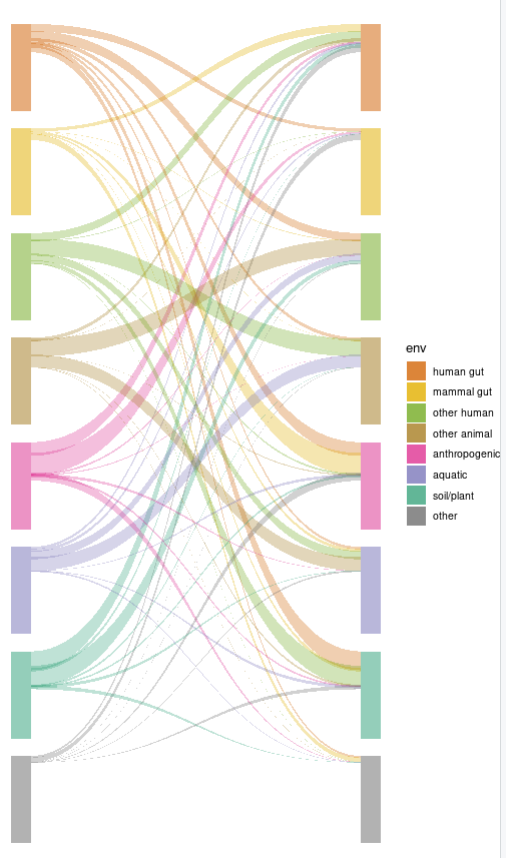

In [296]:
# getting AMP overlap from guts in each host
animal_guts = ['human gut', 'pig gut','mouse gut',
               'dog gut', 'cat gut','cattle gut',
               'chicken gut',]

combs = permutations(animal_guts, 2)

newdf = []
for i, j in combs:
    set_i = data.loc[i, 'amp']
    set_j = data.loc[j, 'amp']
    n = len(set_i.intersection(set_j))
    newdf.append((i, j, n))

for i in animal_guts:
    newdf.append((i,
                  i,
                  len(data.loc[i, 'amp']))
                )


In [297]:
newdf = pd.DataFrame(newdf, columns=['env1', 'env2', 'overlap'])
newdf = newdf.pivot(index='env1', columns='env2', values='overlap')
newdf

env2,cat gut,cattle gut,chicken gut,dog gut,human gut,mouse gut,pig gut
env1,,,,,,,
cat gut,2537,329,264,737,1995,121,426
cattle gut,329,32527,574,406,3866,242,4627
chicken gut,264,574,18259,268,8302,407,1114
dog gut,737,406,268,3392,1835,143,394
human gut,1995,3866,8302,1835,111946,1449,13152
mouse gut,121,242,407,143,1449,7438,362
pig gut,426,4627,1114,394,13152,362,50247


In [298]:
newdf.to_csv("animal_newdf.txt",sep="\t") # this file is used in the R script

In [299]:
data_animal_gut = data.loc[animal_guts,]

# prepare data for R figures
animals=data_animal_gut.index.values.tolist()
sets=data_animal_gut.amp.tolist()
animals

res=getPositon(7)
res=pd.DataFrame(res)
res.to_csv("animal_position.txt")   # this file is used in the R script

# For human body sites

In [300]:
human_body = ['human gut','human skin', 'human respiratory tract',
              'human mouth',
              'human digestive tract',
              'human urogenital tract']

# we need to account for human mouth and human saliva
# they will become just human mouth

n = data.loc['human mouth', 'amp'].union(data.loc['human saliva', 'amp'])
data = data.drop(['human mouth', 'human saliva'], axis=0)
data.loc['human mouth', 'amp'] = n

In [302]:
data_animal_gut = data.loc[human_body,]

# prepare data for R figures
animals=data_animal_gut.index.values.tolist()
sets=data_animal_gut.amp.tolist()
animals

res=getPositon(6)
res=pd.DataFrame(res)
res.to_csv("human_sites_position.txt")   # this file is use to R

In [303]:
# calculating overlaps
combs = permutations(human_body, 2)

newdf = []
for i, j in combs:
    set_i = data.loc[i, 'amp']
    set_j = data.loc[j, 'amp']
    n = len(set_i.intersection(set_j))
    newdf.append((i, j, n))

# adding pairs of same index
for i in human_body:
    newdf.append((i,
                  i,
                  len(data.loc[i, 'amp']))
                )

# formatting result
newdf = pd.DataFrame(newdf, columns=['env1', 'env2', 'overlap'])
newdf = newdf.pivot(index='env1', columns='env2', values='overlap')
newdf

env2,human digestive tract,human gut,human mouth,human respiratory tract,human skin,human urogenital tract
env1,,,,,,
human digestive tract,654,313,607,327,113,8
human gut,313,111946,3194,1196,1476,181
human mouth,607,3194,13624,2475,854,25
human respiratory tract,327,1196,2475,3377,419,12
human skin,113,1476,854,419,6295,76
human urogenital tract,8,181,25,12,76,269


In [304]:
newdf.to_csv("human_sites_newdf.txt",sep="\t") # this file is used in the R script

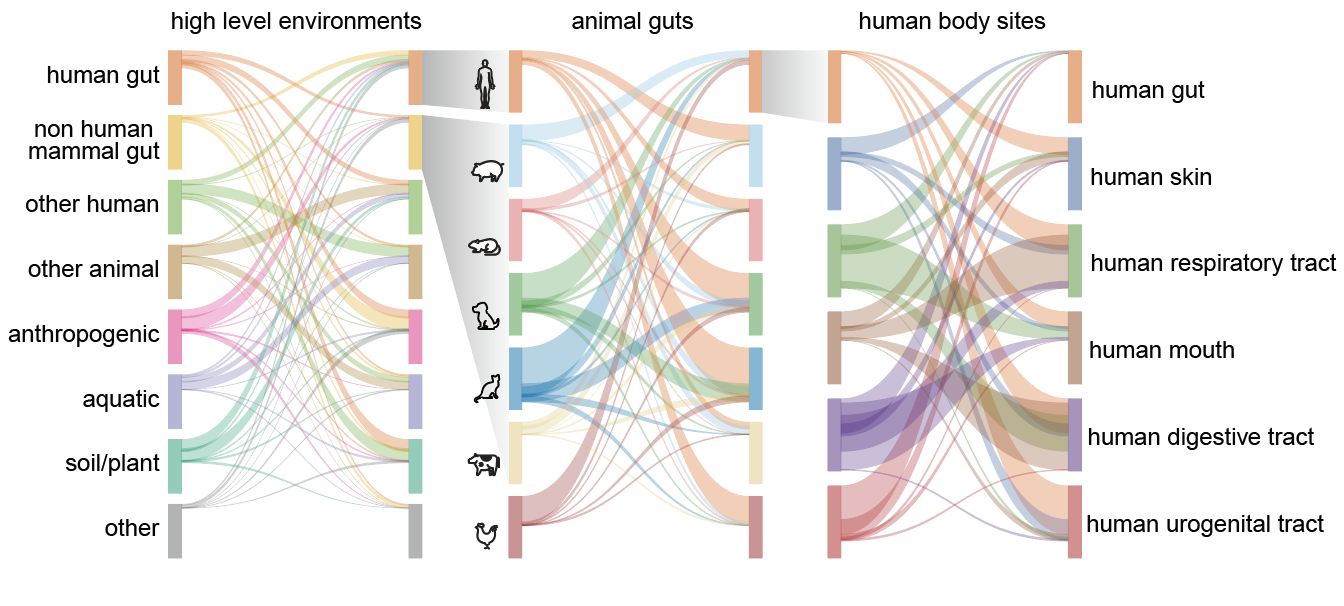